In [1]:
%pylab inline
from mpl_toolkits.mplot3d import Axes3D

Populating the interactive namespace from numpy and matplotlib


In [2]:
def sphere_points(x0,y0,z0,r):
    ''' gives points on a sphere'''
    theta,phi=mgrid[0:2*np.pi:100j,0:np.pi:100j]
    x=x0+r*cos(theta)*sin(phi)
    y=y0+r*sin(theta)*sin(phi)
    z=z0+r*cos(phi)
    return x,y,z

In [3]:
def Rx(theta):
    'rotation around x axis'
    return array([[1,0,0],
         [0,cos(theta),-sin(theta)],
         [0,sin(theta),cos(theta)]])

def Ry(theta):
    'rotation around y axis'
    return array([[cos(theta),0,sin(theta)],
         [0,1,0],
         [-sin(theta),0,cos(theta)]])
def Rz(theta):
    'rotation around z axis'
    return array([[1,0,0],
         [sin(theta),cos(theta),0],
         [0,0,1]])


In [4]:
a=array([0,0,0])
b=array([0,-4.8,0])
c=array([4.1569,-2.4,0])
i=array([2.7669,-2.4,0])
j=array([0.7317,-1.275,0])
k=array([0.7317,-3.525,0])
c_sphere=sphere_points(c[0],c[1],c[2],4.8)
a_sphere=sphere_points(a[0],a[1],a[2],4.8)
b_sphere=sphere_points(b[0],b[1],b[2],4.8)
c2_sphere=sphere_points(c[0],c[1],c[2],3.7)
a2_sphere=sphere_points(a[0],a[1],a[2],3.7)
b2_sphere=sphere_points(b[0],b[1],b[2],3.7)
i_sphere=sphere_points(i[0],i[1],i[2],2.4)
j_sphere=sphere_points(j[0],j[1],j[2],2.4)
k_sphere=sphere_points(k[0],k[1],k[2],2.4)
i2_sphere=sphere_points(i[0],i[1],i[2],3.7)
j2_sphere=sphere_points(j[0],j[1],j[2],3.7)
k2_sphere=sphere_points(k[0],k[1],k[2],3.7)

In [5]:
def get_plane(p1,p2,p3):
    'defines the plane of the points'
    v1,v2=p2-p1,p2-p1
    cp=cross(v1,v2)
    a,b,c=cp
    d=dot(cp,p3)
    return a,b,c,d
plane=get_plane(a,b,c)
X,Y=mgrid[-15:15,-15:15]
Z=(plane[3] - plane[0] * X - plane[1] * Y) / plane[2]

/Users/James/anaconda/lib/python3.4/site-packages/ipykernel/__main__.py:10: RuntimeWarning: invalid value encountered in true_divide


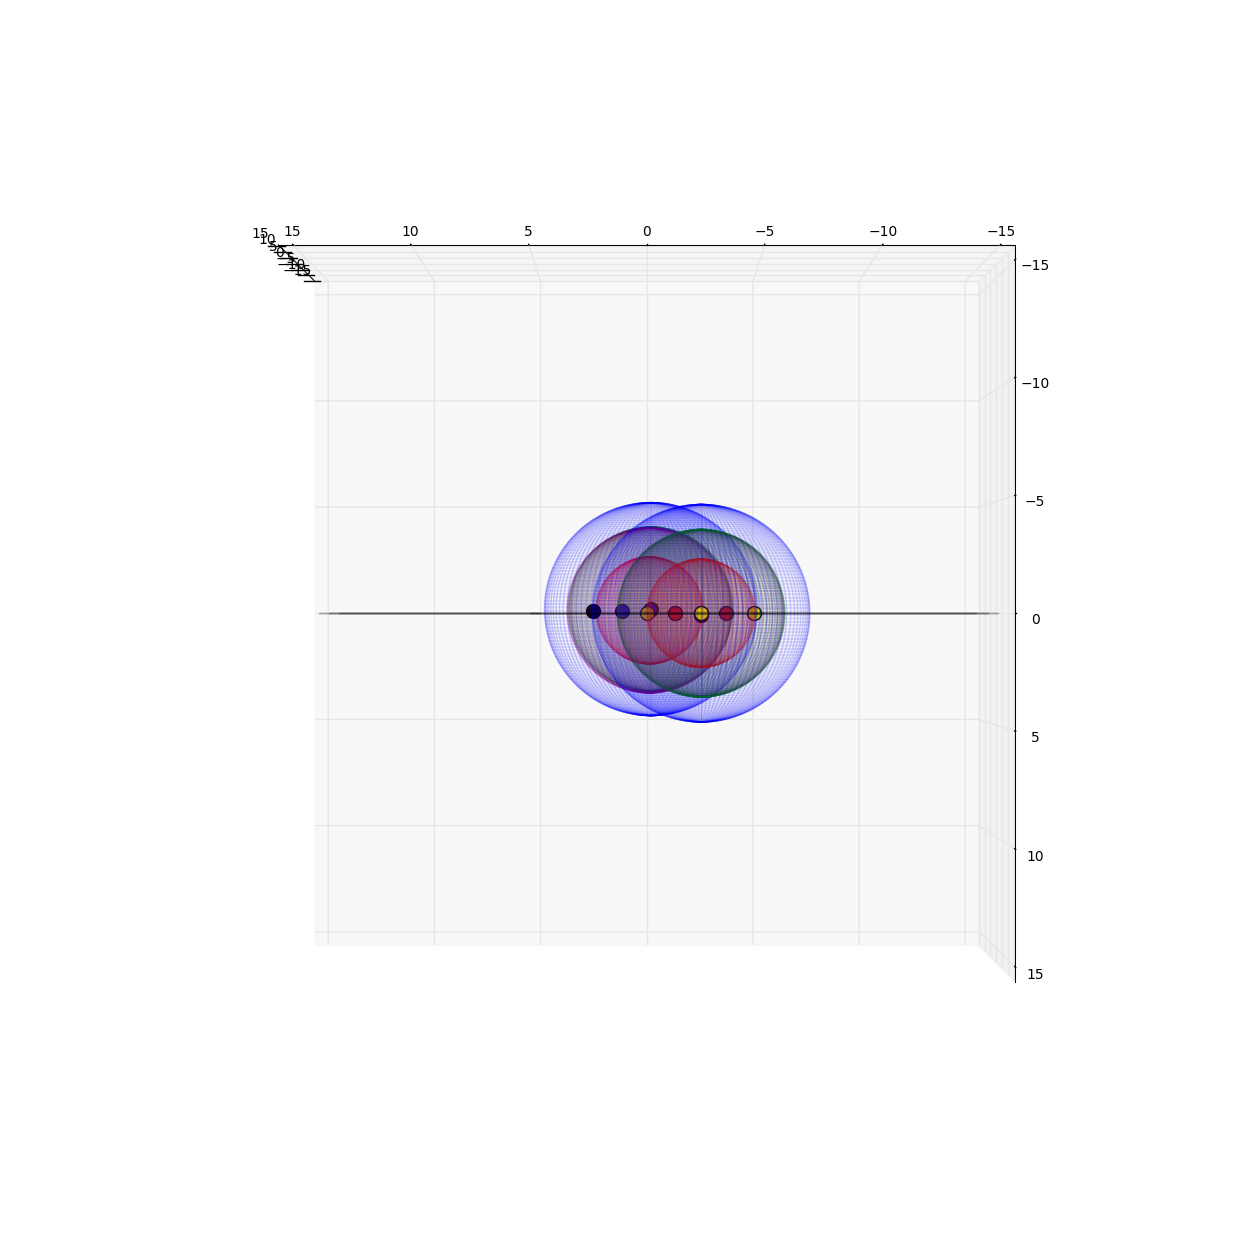

In [6]:
from __future__ import print_function
from ipywidgets import interact
import ipywidgets as widgets
@interact(x3=[-15,15,0.1],y3=[-15,15,0.1],z3=[-15,15,0.1],theta=[0,2*pi,0.1],phi=[0,2*pi,0.1],psi=[0,2*pi,0.1],
          x_angle=[0,360,1],y_angle=[0,360,1])
def movable_triangle(x3,y3,z3,theta,phi,psi,x_angle,y_angle):
    'triangle to be moved'
    aa=array([-4.1569/2,2.4,0])
    bb=array([-4.1569/2,-2.4,0])
    cc=array([4.1569/2,0,0])
    ii=array([-4.1569/2+1.39,1.2,0])
    jj=array([-4.1569/2+1.39,-1.2,0])
    kk=array([4.1569/2-1.39,0,0])
    centroid=array([x3,y3,z3])
    aa_theta=dot(Rx(theta),aa).transpose()
    aa_phi=dot(Ry(phi),aa_theta).transpose()
    aa_psi=dot(Rz(psi),aa_phi).transpose()
    aa_final=aa_psi+centroid
    bb_theta=dot(Rx(theta),bb).transpose()
    bb_phi=dot(Ry(phi),bb_theta).transpose()
    bb_psi=dot(Rz(psi),bb_phi).transpose()
    
    bb_final=bb_psi+centroid
    cc_theta=dot(Rx(theta),cc).transpose()
    cc_phi=dot(Ry(phi),cc_theta).transpose()
    cc_psi=dot(Rz(psi),cc_phi).transpose()
    cc_final=cc_psi+centroid
    ii_theta=dot(Rx(theta),ii).transpose()
    ii_phi=dot(Ry(phi),ii_theta).transpose()
    ii_psi=dot(Rz(psi),ii_phi).transpose()
    
    ii_final=ii_psi+centroid
    jj_theta=dot(Rx(theta),jj).transpose()
    jj_phi=dot(Ry(phi),jj_theta).transpose()
    jj_psi=dot(Rz(psi),jj_phi).transpose()
    jj_final=jj_psi+centroid
    kk_theta=dot(Rx(theta),kk).transpose()
    kk_phi=dot(Ry(phi),kk_theta).transpose()
    kk_psi=dot(Rz(psi),kk_phi).transpose()
    kk_final=kk_psi+centroid
    cc_sphere=sphere_points(cc_final[0],cc_final[1],cc_final[2],4.8)
    cc2_sphere=sphere_points(cc_final[0],cc_final[1],cc_final[2],3.7)
    kk_sphere=sphere_points(kk_final[0],kk_final[1],kk_final[2],2.4)
    kk2_sphere=sphere_points(kk_final[0],kk_final[1],kk_final[2],3.7)
    fig = plt.figure(figsize(20,16))
    ax = fig.gca(projection='3d')
    ax.set_aspect("equal")
    #ax.plot_wireframe(a_sphere[0], a_sphere[1],a_sphere[2],alpha=0.1)
    #ax.plot_wireframe(b_sphere[0], b_sphere[1], b_sphere[2],alpha=0.1)
    ax.plot_wireframe(c_sphere[0], c_sphere[1], c_sphere[2],alpha=0.1)
    ax.plot_wireframe(cc_sphere[0], cc_sphere[1], cc_sphere[2],alpha=0.1)
    #ax.plot_wireframe(a2_sphere[0], a2_sphere[1],a2_sphere[2],alpha=0.1,color='green')
    #ax.plot_wireframe(b2_sphere[0], b2_sphere[1], b2_sphere[2],alpha=0.1,color='green')
    ax.plot_wireframe(c2_sphere[0], c2_sphere[1], c2_sphere[2],alpha=0.1,color='green')
    ax.plot_wireframe(cc2_sphere[0], cc2_sphere[1], cc2_sphere[2],alpha=0.1,color='green')
    ax.plot_wireframe(i_sphere[0], i_sphere[1],i_sphere[2],alpha=0.1,color='red')
    #ax.plot_wireframe(ii_sphere[0], ii_sphere[1],ii_sphere[2],alpha=0.1,color='red')
    #ax.plot_wireframe(j_sphere[0], j_sphere[1], j_sphere[2],alpha=0.1,color='red')
    ax.plot_wireframe(kk_sphere[0], kk_sphere[1], kk_sphere[2],alpha=0.1,color='red')
    ax.plot_wireframe(i2_sphere[0], i2_sphere[1],i2_sphere[2],alpha=0.1,color='purple')
    ax.plot_wireframe(kk2_sphere[0], kk2_sphere[1],kk2_sphere[2],alpha=0.1,color='purple')
    #ax.plot_wireframe(j2_sphere[0], j2_sphere[1], j2_sphere[2],alpha=0.1,color='purple')
    #ax.plot_wireframe(k2_sphere[0], k2_sphere[1], k2_sphere[2],alpha=0.1,color='purple')
    ax.scatter(a[0],a[1],a[2],c='yellow',s=100)
    ax.scatter(b[0],b[1],b[2],c='yellow',s=100)
    ax.scatter(c[0],c[1],c[2],c='yellow',s=100)
    ax.scatter(i[0],i[1],i[2],c='red',s=100)
    ax.scatter(j[0],j[1],j[2],c='red',s=100)
    ax.scatter(k[0],k[1],k[2],c='red',s=100)
    ax.scatter(aa_final[0],aa_final[1],aa_final[2],c='black',s=100)
    ax.scatter(bb_final[0],bb_final[1],bb_final[2],c='black',s=100)
    ax.scatter(cc_final[0],cc_final[1],cc_final[2],c='black',s=100)
    ax.scatter(ii_final[0],ii_final[1],ii_final[2],c='blue',s=100)
    ax.scatter(jj_final[0],jj_final[1],jj_final[2],c='blue',s=100)
    ax.scatter(kk_final[0],kk_final[1],kk_final[2],c='blue',s=100)
    ax.plot_surface(X,Y,0,color='orange',alpha=0.3)
    ax.view_init(x_angle,y_angle)
    plt.ylim(-15,15)
    plt.xlim(-15,15)
    ax.set_zlim(-15,15)
    plt.show()